# Comparison of Classifiers for Student Performance Prediction

## The dataset


### What is the purpose of the dataset?
This dataset is for creating classification models that will predict the students dropout and their academic success.

### What are the features


Each instance in the dataset represents a student.

### What is the target?

The target is


## Analyzing the dataset

In [155]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [156]:
dataset = pd.read_csv('dataset_student_performance.csv',sep=";")
dataset.info()
#dataframe = pd.DataFrame(dataset)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [157]:
#dataset.head()

## "Data washing"

By looking at the contents of the dataset. We observe that the features are already encoded into integers.
So what we will need to do is 
- Split the features into categorical and numerical features.

After that is done, we will need to 
- Encode the categorical ones differently so they are not integers, we can achieve this by using one hot encoding.

### Splitting the features into categorical and numerical features

By using the dataset.info(), we can see what features are numerical and integer(categorical).
We need to be cautious to not assume all the integers are categorical. For instance, age, is not a catagorical feature even though it's an integer.

The numerical:

- 6,   Previous qualification (grade)                  , float64
- 12,  Admission grade                                 , float64
- 25,  Curricular units 1st sem (grade)                , float64
- 31,  Curricular units 2nd sem (grade)                , float64
- 33,  Unemployment rate                               , float64
- 34,  Inflation rate                                  , float64
- 35,  GDP                                             , float64

The target: 
- 36  Target,  object, which is three categories, encoded as ints. (dropout, enrolled, and graduate)

By inspecting the documentation further, we can now make an overview over what integers are categorical, and which are not.

The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The non categorical: 

- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32  Curricular units 2nd sem (without evaluations), int64  


So, now we can combine them and perphaps group them into the following:


The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The numerical:

- 6,  Previous qualification (grade), float64
- 12, Admission grade, float64
- 25, Curricular units 1st sem (grade), float64
- 31, Curricular units 2nd sem (grade), float64
- 33, Unemployment rate, float64
- 34, Inflation rate, float64
- 35, GDP, float64
- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32, Curricular units 2nd sem (without evaluations), int64  

The target(categorical): 
- 36  Target,  object

In [158]:
#print(dataset.columns.tolist())
#Here we can double check that the syntax of the lists are correct according to the index.
#'Daytime/evening attendance\t' will give an index error if the \t is not included.

In [159]:
categorical_features = [
    "Marital status", "Application mode", "Application order", "Course", 
    "Daytime/evening attendance\t", "Previous qualification", "Nacionality", 
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", "Displaced", "Educational special needs", "Debtor", 
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

numerical_features = [
    "Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", 
    "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", 
    "Age at enrollment", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", 
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", 
    "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", 
    "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", 
    "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (without evaluations)"
]

target = "Target"
dataset_categorical = dataset[categorical_features]
dataset_numerical = dataset[numerical_features]
dataset_target = dataset[target]

<Axes: >

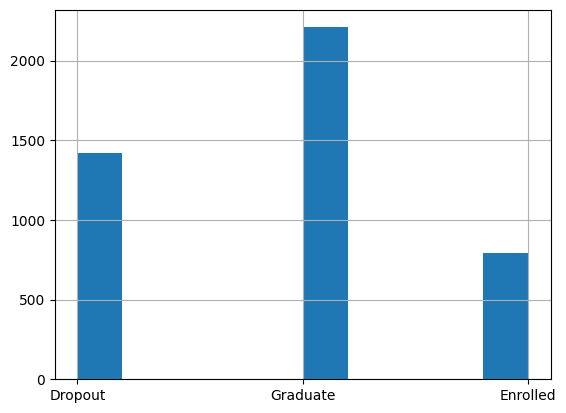

In [160]:
dataset_target.hist()

We need to balance the classes, because we can see that the model will train on more graduate since there is more data in that output?

In [161]:
#dataset_oversampled,_ = SMOTENC('auto').fit_resample(categorical_features, dataset['Target'])
#dataset_oversampled_dataframe = pd.concat


## Making Onehot encoding of the categorical features


In [162]:
dataset_categorical_onehot = pd.get_dummies(dataset_categorical)
#dataset_categorical_onehot.info()

In [163]:
combined_dataset = pd.concat([dataset_numerical, dataset_target, dataset_categorical_onehot], axis=1)
combined_dataset.head()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74,20,0,0,...,12,5,9,1,0,0,1,1,0,0
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79,19,0,6,...,3,3,3,1,0,0,0,1,0,0
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74,19,0,6,...,37,9,9,1,0,0,0,1,0,0
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12,20,0,6,...,37,5,3,1,0,0,1,0,0,0
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79,45,0,6,...,38,9,9,0,0,0,1,0,0,0


## Now lets combine them together again


In [164]:
combined_dataset = pd.concat([dataset_numerical, dataset_target, dataset_categorical_onehot], axis=1)
#combined_dataset.info()

In [165]:
#dataset_features = combined_dataset.drop(["Target"], axis=1)

## Creating our split

In [166]:
train_val = combined_dataset.groupby('Target', group_keys=False)[combined_dataset.columns].apply(lambda x: x.sample(frac=0.8))
test_set = combined_dataset.drop(train_val.index)

In [167]:
#feature_train, feature_test, target_train, target_test = train_test_split(dataset_features,dataset_target, test_size=0.2, random_state=42)

In [168]:
features = combined_dataset.drop('Target', axis=1)
targets = combined_dataset['Target']

train_val_features = train_val.drop('Target', axis=1)
train_val_targets = train_val['Target']

test_features = test_set.drop('Target', axis=1)
test_targets = test_set['Target']

## Pre-proccessing 

Lets proceed with the dataset now, and see what kind of results it produces. After that we can take pre processing steps to see how it changes the result.
But here we can expand by trying out normalization, PCA, etc.

## Splitting

### Why this split percentage
### Why this sampling technique

## Creating the models


In [169]:
decision_tree_model1 = DecisionTreeClassifier(max_depth=5,random_state=42)

decision_tree_model1.fit(train_val_features, train_val_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Evaluation function


In [170]:

def evaluate(model):
    train_probabilities = model.predict_proba(train_val_features)
    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)

    print(f'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training Recall: {recall_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training F1: {f1_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="macro", multi_class="ovr")}')

    test_probabilities = model.predict_proba(test_features)
    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)

    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test Recall: {recall_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test F1: {f1_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test ROC AUC: {roc_auc_score(test_targets, test_probabilities, average="macro", multi_class="ovr")}')
    print()

#

In [171]:
    evaluate(decision_tree_model1)

Training Accuracy: 0.7739474427804465
Training Precision: 0.765058880507797
Training Recall: 0.7739474427804465
Training F1: 0.7609485250059037
Training ROC AUC: 0.8700298240587556
Test Accuracy: 0.7152542372881356
Test Precision: 0.6975863292215864
Test Recall: 0.7152542372881356
Test F1: 0.6971593568852015
Test ROC AUC: 0.8238756300081523



### Naive Bayes

In [172]:
naive_bayes_model1 = GaussianNB()
naive_bayes_model1.fit(train_val_features, train_val_targets)

GaussianNB()

In [173]:
evaluate(naive_bayes_model1)

Training Accuracy: 0.6934162192709805
Training Precision: 0.6822182091036239
Training Recall: 0.6934162192709805
Training F1: 0.6857819922949103
Training ROC AUC: 0.8079823710500033
Test Accuracy: 0.6915254237288135
Test Precision: 0.6835124472024565
Test Recall: 0.6915254237288135
Test F1: 0.685813822001724
Test ROC AUC: 0.7829493710046599



In [174]:
random_forest_model1 = RandomForestClassifier(max_depth=5, random_state=42)
random_forest_model1.fit(train_val_features, train_val_targets)

RandomForestClassifier(max_depth=5, random_state=42)

In [175]:
evaluate(random_forest_model1)

Training Accuracy: 0.7784684939248375
Training Precision: 0.776344122907389
Training Recall: 0.7784684939248375
Training F1: 0.7431394631516647
Training ROC AUC: 0.8985897499641111
Test Accuracy: 0.735593220338983
Test Precision: 0.7151880570613843
Test Recall: 0.735593220338983
Test F1: 0.6966333495501774
Test ROC AUC: 0.8615438684296274



## Tuning the hyperparameters

### Grid search vs Random search

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

metrics = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']
#encoder = LabelEncoder()
#train_val_targets_encoded = encoder.fit_transform(train_val_targets)

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    {
        #'max_depth': np.arange(1, 15, 5),
        'n_estimators': np.arange(5, 100, 10),
        #'max_features': np.arange(0.1, 1.0, 0.05),
    },
    cv=5,
    scoring=metrics,
    refit='f1_micro',#metrics?
    verbose=1,
    n_jobs=-1
)
grid_search.fit(train_val_features, train_val_targets)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])},
             refit='f1_micro',
             scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro',
                      'roc_auc_ovr'],
             verbose=1)

In [177]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_f1_micro,rank_test_f1_micro,split0_test_roc_auc_ovr,split1_test_roc_auc_ovr,split2_test_roc_auc_ovr,split3_test_roc_auc_ovr,split4_test_roc_auc_ovr,mean_test_roc_auc_ovr,std_test_roc_auc_ovr,rank_test_roc_auc_ovr
0,0.043939,0.005036,0.031967,0.009146,5,{'n_estimators': 5},0.737288,0.731638,0.717514,0.740113,...,0.008004,10,0.819752,0.829108,0.837312,0.821602,0.824679,0.826491,0.006270,10
1,0.132724,0.011599,0.044243,0.014035,15,{'n_estimators': 15},0.744350,0.761299,0.772599,0.752825,...,0.009400,9,0.841322,0.859617,0.883193,0.850520,0.865294,0.859989,0.014176,9
2,0.213282,0.010837,0.040530,0.005763,25,{'n_estimators': 25},0.740113,0.782486,0.772599,0.765537,...,0.014033,8,0.848978,0.871838,0.891434,0.858149,0.874034,0.868887,0.014528,8
3,0.286335,0.008682,0.087006,0.045561,35,{'n_estimators': 35},0.752825,0.775424,0.776836,0.778249,...,0.009497,5,0.854524,0.876661,0.894012,0.863082,0.876728,0.873001,0.013480,7
4,0.523163,0.026233,0.045760,0.003335,45,{'n_estimators': 45},0.750000,0.775424,0.774011,0.781073,...,0.010843,7,0.857585,0.879224,0.895271,0.870089,0.882495,0.876933,0.012599,6
5,0.462889,0.090370,0.047872,0.006607,55,{'n_estimators': 55},0.751412,0.785311,0.782486,0.781073,...,0.012307,3,0.861488,0.881131,0.897647,0.869357,0.885117,0.878948,0.012564,5
6,0.561633,0.105987,0.054545,0.003515,65,{'n_estimators': 65},0.758475,0.779661,0.782486,0.782486,...,0.008998,1,0.863077,0.879190,0.899087,0.869629,0.887439,0.879684,0.012757,4
7,0.534529,0.047747,0.045787,0.007611,75,{'n_estimators': 75},0.752825,0.778249,0.775424,0.782486,...,0.011235,4,0.864788,0.881037,0.898140,0.872016,0.890062,0.881209,0.011994,3
8,0.569152,0.051148,0.047977,0.004144,85,{'n_estimators': 85},0.744350,0.776836,0.772599,0.781073,...,0.013737,6,0.866890,0.882638,0.899816,0.873074,0.891401,0.882764,0.011927,2
9,0.581930,0.045618,0.044455,0.006333,95,{'n_estimators': 95},0.750000,0.776836,0.779661,0.788136,...,0.013217,2,0.868210,0.882104,0.900301,0.875378,0.893097,0.883818,0.011624,1


## Creating a function for GridSearch

In [181]:
param_grid_RF = {
        'max_depth': np.arange(1, 15, 5),
        'n_estimators': np.arange(5, 100, 10),
        'max_features': np.arange(0.1, 1.0, 0.05),
        }

In [182]:
def train_grid_search(classifier, parameter_grid, scoring,refit, features, target, cv=5, verbose=1):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=parameter_grid,
        scoring=scoring,
        refit=refit,
        cv=cv,
        verbose=verbose,
        n_jobs=-1
    )

    grid_search.fit(features, target)

    results = pd.DataFrame(grid_search.cv_results_)

    best_model = grid_search.best_estimator_

    print(f"best parameters: {grid_search.best_params_}")
    print(f"best score: {grid_search.best_score_:.4f}")

    return best_model, results

In [183]:
train_grid_search(RandomForestClassifier(),param_grid_RF,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
best parameters: {'max_depth': np.int64(11), 'max_features': np.float64(0.15000000000000002), 'n_estimators': np.int64(95)}
best score: 0.7765


(RandomForestClassifier(max_depth=np.int64(11),
                        max_features=np.float64(0.15000000000000002),
                        n_estimators=np.int64(95)),
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0         0.010578      0.002638         0.031214        0.003442   
 1         0.034169      0.003672         0.033865        0.004649   
 2         0.059322      0.006429         0.035625        0.007133   
 3         0.078611      0.004834         0.035852        0.002845   
 4         0.098776      0.010169         0.034329        0.003671   
 ..             ...           ...              ...             ...   
 535       1.167704      0.008351         0.041409        0.002552   
 536       1.359162      0.014293         0.045274        0.005465   
 537       1.596421      0.028549         0.046326        0.002041   
 538       1.793234      0.039354         0.048940        0.006788   
 539       1.891520      0.067668         0.038038        0.

## The Results


## Comparison of the classifiers



## Conclusion

## Possible improvements
Using pipeline in the "data washing"
